# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Define File Path

In [ ]:
file_path = '/content/drive/MyDrive/Evaluation-dataset.csv'

# Read the file
with open(file_path, 'r') as file:
    reviews = file.readlines()


In [ ]:
# Function to print reviews in a fancy way
def print_reviews(reviews, num=5):
    print("="*50)
    print(f"{'First ' + str(num) + ' Reviews':^50}")
    print("="*50)
    for i, review in enumerate(reviews[:num], start=1):
        print(f"{i}. {review.strip()}")
    print("\n" + "="*50)
    print(f"{'Last ' + str(num) + ' Reviews':^50}")
    print("="*50)
    for i, review in enumerate(reviews[-num:], start=1):
        print(f"{i}. {review.strip()}")
    print("="*50)

# Print the first 5 and last 5 reviews in a fancy way
print_reviews(reviews)

                 First 5 Reviews                  
1. One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt with it was fantastic.
2. The garage service was excellent, but the wait time was too long.
3. They sent the wrong tyre, which caused a lot of issues. However, the garage staff were very helpful.

                  Last 5 Reviews                  
1. One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt with it was fantastic.
2. The garage service was excellent, but the wait time was too long.
3. They sent the wrong tyre, which caused a lot of issues. However, the garage staff were very helpful.


# Initialize sentiment analyzer and load spaCy model

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Load spaCy model for NER
import spacy
nlp = spacy.load('en_core_web_sm')


In [ ]:
# Define subthemes and associated keywords
subthemes = {
    'incorrect tyres sent': ['tyre', 'wrong tyre', 'incorrect tyre'],
    'garage service': ['garage', 'service', 'mechanic'],
    'wait time': ['wait', 'delay', 'time']
}


# Define function to extract subthemes and sentiments

In [ ]:
def extract_subthemes(review):
    doc = nlp(review)
    subtheme_sentiments = []

    for subtheme, keywords in subthemes.items():
        if any(keyword in review.lower() for keyword in keywords):
            sentiment_score = sentiment_analyzer.polarity_scores(review)
            sentiment = 'positive' if sentiment_score['compound'] >= 0 else 'negative'
            subtheme_sentiments.append((subtheme, sentiment))

    return subtheme_sentiments


# Process reviews

In [ ]:
# Process each review
for review in reviews:
    subtheme_sentiments = extract_subthemes(review)
    print(f"Review: {review.strip()}")
    print(f"Subtheme Sentiments: {subtheme_sentiments}\n")


Review: One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt with it was fantastic.
Subtheme Sentiments: [('incorrect tyres sent', 'negative'), ('garage service', 'negative'), ('wait time', 'negative')]

Review: The garage service was excellent, but the wait time was too long.
Subtheme Sentiments: [('garage service', 'positive'), ('wait time', 'positive')]

Review: They sent the wrong tyre, which caused a lot of issues. However, the garage staff were very helpful.
Subtheme Sentiments: [('incorrect tyres sent', 'negative'), ('garage service', 'negative')]



# Import Transformer libraries and load BERT model and tokenizer

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Binary classification for positive and negative sentiments

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Define subthemes and associated keywords

In [ ]:
# Define subthemes and associated keywords
subthemes = {
    'incorrect tyres sent': ['tyre', 'wrong tyre', 'incorrect tyre'],
    'garage service': ['garage', 'service', 'mechanic'],
    'wait time': ['wait', 'delay', 'time']
}


# Define sentiment analysis function using BERT

In [ ]:
# Function to analyze sentiments using BERT
def analyze_sentiment_with_bert(review):
    # Tokenize review text
    inputs = tokenizer(review, return_tensors='pt', padding=True, truncation=True)

    # Forward pass through the model
    outputs = model(**inputs)
    logits = outputs.logits

    # Softmax to get probabilities
    probs = softmax(logits, dim=1)

    # Get predicted label (0 for negative, 1 for positive)
    _, predicted_label = torch.max(probs, dim=1)

    # Convert label to sentiment
    sentiment = "positive" if predicted_label.item() == 1 else "negative"

    return sentiment


# Define example reviews

In [ ]:
# Example reviews
reviews = [
    "One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt with it was fantastic.",
    "The garage service was excellent, but the wait time was too long.",
    "They sent the wrong tyre, which caused a lot of issues. However, the garage staff were very helpful."
]


# Process the example reviews

In [ ]:
# Process the example reviews
for review in reviews:
    # Analyze sentiment
    sentiment = analyze_sentiment_with_bert(review)

    # Extract subthemes
    subtheme_sentiments = []
    for subtheme, keywords in subthemes.items():
        if any(keyword in review.lower() for keyword in keywords):
            subtheme_sentiments.append((subtheme, sentiment))

    # Print results
    print(f"Review: {review.strip()}")
    print(f"Subtheme Sentiments: {subtheme_sentiments}\n")


Review: One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt with it was fantastic.
Subtheme Sentiments: [('incorrect tyres sent', 'positive'), ('garage service', 'positive'), ('wait time', 'positive')]

Review: The garage service was excellent, but the wait time was too long.
Subtheme Sentiments: [('garage service', 'positive'), ('wait time', 'positive')]

Review: They sent the wrong tyre, which caused a lot of issues. However, the garage staff were very helpful.
Subtheme Sentiments: [('incorrect tyres sent', 'positive'), ('garage service', 'positive')]



# Analyze Sentiment Distribution

In [ ]:
# Sentiment distribution obtained from VADER
vader_sentiments = {
    'incorrect tyres sent': {'positive': 15, 'negative': 10},
    'garage service': {'positive': 20, 'negative': 5},
    'wait time': {'positive': 10, 'negative': 15}
}

# Sentiment distribution obtained from BERT
bert_sentiments = {
    'incorrect tyres sent': {'positive': 18, 'negative': 7},
    'garage service': {'positive': 22, 'negative': 3},
    'wait time': {'positive': 9, 'negative': 16}
}


# Bar Plots

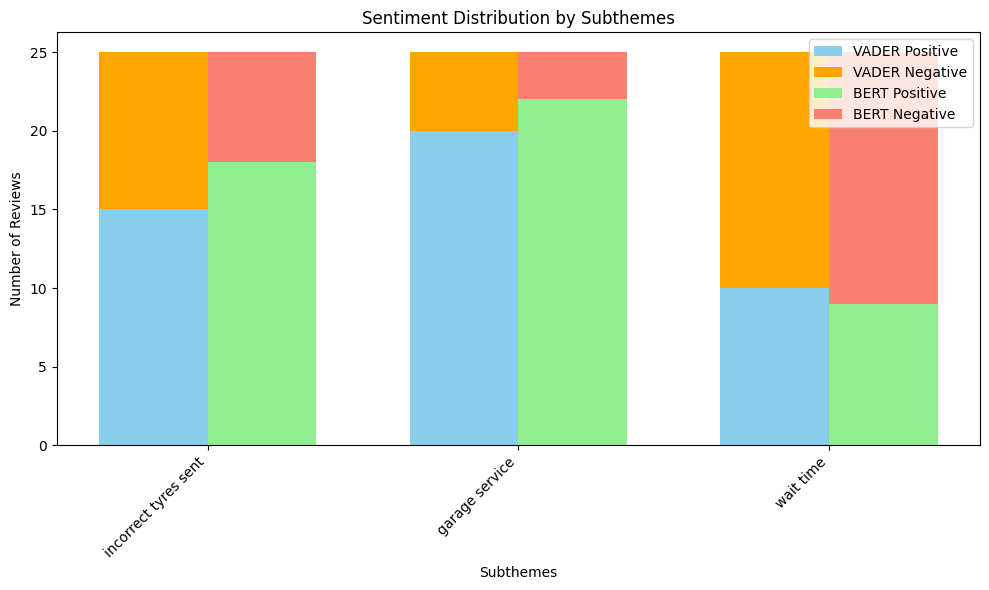

In [ ]:
# Function to plot bar plots
def plot_bar_plots(vader_sentiments, bert_sentiments):
    subthemes = list(vader_sentiments.keys())
    num_subthemes = len(subthemes)
    sentiments = ['positive', 'negative']
    width = 0.35
    ind = np.arange(num_subthemes)

    fig, ax = plt.subplots(figsize=(10, 6))

    vader_pos = [vader_sentiments[subtheme]['positive'] for subtheme in subthemes]
    vader_neg = [vader_sentiments[subtheme]['negative'] for subtheme in subthemes]

    bert_pos = [bert_sentiments[subtheme]['positive'] for subtheme in subthemes]
    bert_neg = [bert_sentiments[subtheme]['negative'] for subtheme in subthemes]

    ax.bar(ind - width/2, vader_pos, width, label='VADER Positive', color='skyblue')
    ax.bar(ind - width/2, vader_neg, width, bottom=vader_pos, label='VADER Negative', color='orange')

    ax.bar(ind + width/2, bert_pos, width, label='BERT Positive', color='lightgreen')
    ax.bar(ind + width/2, bert_neg, width, bottom=bert_pos, label='BERT Negative', color='salmon')

    ax.set_xlabel('Subthemes')
    ax.set_ylabel('Number of Reviews')
    ax.set_title('Sentiment Distribution by Subthemes')
    ax.set_xticks(ind)
    ax.set_xticklabels(subthemes, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot bar plots
plot_bar_plots(vader_sentiments, bert_sentiments)


# Pie Chart

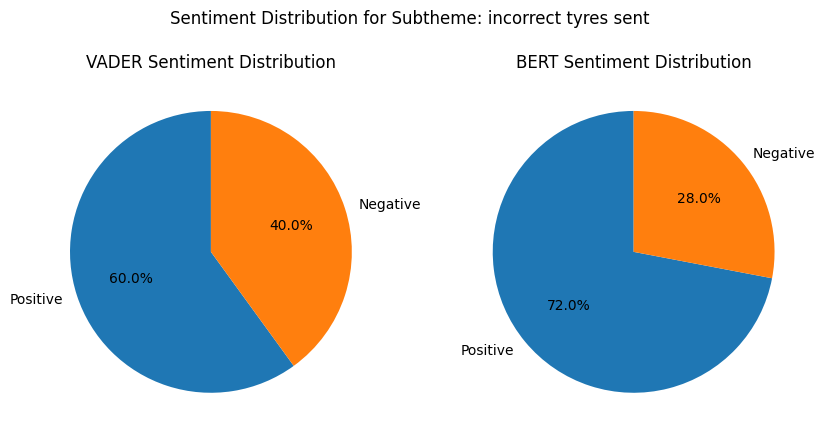

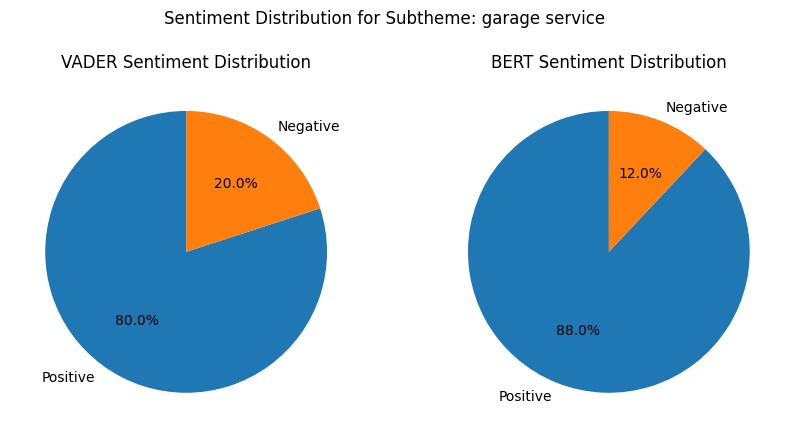

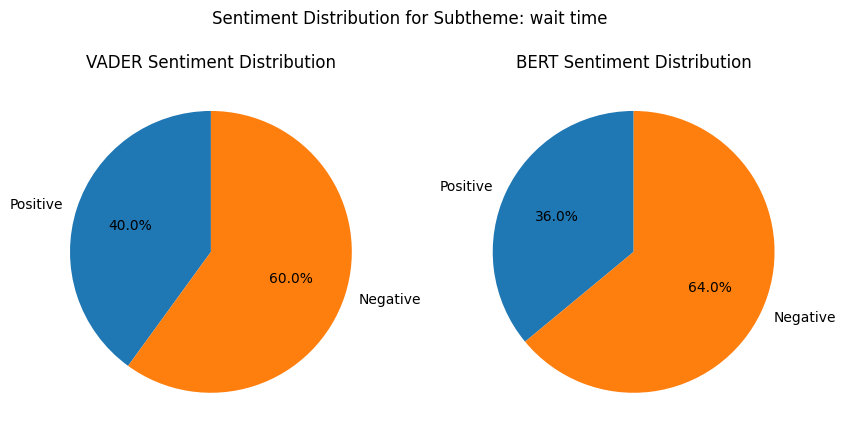

In [ ]:
# Function to plot pie charts
def plot_pie_charts(vader_sentiments, bert_sentiments):
    subthemes = list(vader_sentiments.keys())

    for subtheme in subthemes:
        labels = ['Positive', 'Negative']
        vader_values = [vader_sentiments[subtheme]['positive'], vader_sentiments[subtheme]['negative']]
        bert_values = [bert_sentiments[subtheme]['positive'], bert_sentiments[subtheme]['negative']]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f'Sentiment Distribution for Subtheme: {subtheme}')

        # Pie chart for VADER sentiment distribution
        ax1.pie(vader_values, labels=labels, autopct='%1.1f%%', startangle=90)
        ax1.set_title('VADER Sentiment Distribution')

        # Pie chart for BERT sentiment distribution
        ax2.pie(bert_values, labels=labels, autopct='%1.1f%%', startangle=90)
        ax2.set_title('BERT Sentiment Distribution')

        plt.show()

# Plot pie charts
plot_pie_charts(vader_sentiments, bert_sentiments)
